# 4. Thinking probabilistically-- Continuous variables

Sudah waktunya untuk beralih ke continuous variables, seperti yang dapat mengambil nilai fraksional apa pun. Banyak prinsip yang sama, tetapi ada beberapa kehalusan. Pada akhir bab terakhir ini, Anda akan berbicara bahasa probabilistik yang Anda butuhkan untuk memulai ke teknik inferensi yang tercakup dalam sekuel dari kursus ini.

## Preparing Data and Library

In [1]:
# Import modules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set default Seaborn style
sns.set()

## Probability density functions

### Interpreting PDFs

Pertimbangkan PDF yang ditunjukkan di bawah ini. Manakah dari berikut ini yang benar?

**Benar**
* x lebih cenderung **kurang dari 10** daripada lebih besar dari 10.

**Salah**
* x lebih cenderung **lebih besar dari 10** daripada lebih kecil dari 10.
* Kami tidak dapat memberi tahu dari PDF jika x mungkin lebih besar dari atau kurang dari 10.
* Ini bukan PDF yang valid karena memiliki dua puncak.

![](images/pdf.svg)

**Note** : Probabilitas diberikan oleh area di bawah PDF, dan ada lebih banyak area di sebelah kiri 10 daripada ke kanan.

### Interpreting CDFs

Di bawah ini adalah CDF yang sesuai dengan PDF yang Anda pertimbangkan dalam latihan terakhir. Menggunakan CDF, berapakah probabilitas x lebih besar dari 10?

![](images/cdf.svg)

**Answer** : 0.25

**Note** : Nilai CDF pada x = 10 adalah 0,75, sehingga probabilitas x < 10 adalah 0,75. Dengan demikian, probabilitas bahwa x > 10 adalah 0,25.

## Introduction to the Normal distribution

### The Normal PDF

Dalam latihan ini, Anda akan menjelajahi PDF Normal dan juga mempelajari cara untuk plotting PDF dari distribusi yang diketahui menggunakan hacker statistics. Secara khusus, Anda akan memplot PDF Normal untuk berbagai nilai varians.

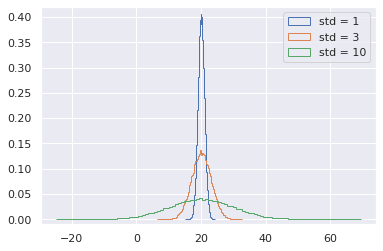

In [3]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
_ = plt.hist(samples_std1, bins=100, density=True, histtype='step')
_ = plt.hist(samples_std3, bins=100, density=True, histtype='step')
_ = plt.hist(samples_std10, bins=100, density=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

**Note** : Anda dapat melihat bagaimana perbedaan standar deviasi menghasilkan PDF dengan lebar berbeda. Puncak semua berpusat pada rata-rata 20.

### The Normal CDF

Sekarang setelah Anda merasakan bagaimana tampilan Normal PDF, mari kita pertimbangkan CDF-nya.

In [4]:
# Computing the ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

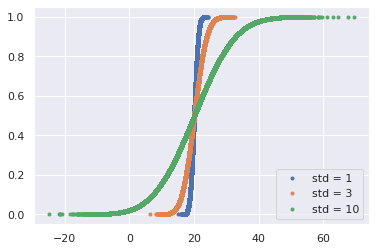

In [5]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

**Note** : Semua CDF melewati mean pada persentil ke-50; mean dan median dari distribusi Normal adalah sama. Lebar CDF bervariasi dengan standar deviasi.

## The Normal distribution: Properties and warnings

### Gauss and the 10 Deutschmark banknote

Apa rata-rata dan standar deviasi, masing-masing, dari distribusi Normal yang ada di 10 uang kertas Deutschmark, ditunjukkan di bawah ini?

![](images/deutschmark.svg)

**Answer** : mean = 3, std = 1

### Are the Belmont Stakes results Normally distributed?

Sejak tahun 1926, Taruhan Belmont adalah perlombaan kuda ras berusia 3 tahun yang panjangnya 1,5 mil. [Sekretariat](https://en.wikipedia.org/wiki/Secretariat_(horse)) menjalankan Taruhan Belmont tercepat dalam sejarah pada tahun 1973. Sementara itu adalah tahun tercepat, 1970 adalah yang paling lambat karena kondisi basah dan ceroboh. Dengan dua pencilan ini dihapus dari kumpulan data, hitung rata-rata dan standar deviasi dari waktu para pemenang Belmont. Sampel dari distribusi Normal dengan mean dan standar deviasi ini menggunakan fungsi `np.random.normal()` dan plot CDF. Overlay ECDF dari masa Belmont yang menang. Apakah ini dekat dengan terdistribusi secara normal?

Catatan: Justin mengumpulkan data tentang Taruhan Belmont dari [halaman Belmont Wikipedia](https://en.wikipedia.org/wiki/Belmont_Stakes).

In [6]:
# Create data array
belmont_no_outliers = np.array([148.51, 146.65, 148.52, 150.7, 150.42000000000002, 150.88, 151.57, 147.54, 149.65, 148.74, 147.86, 148.75, 147.5, 148.26, 149.71, 146.56, 151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97, 146.13, 148.1, 147.2, 146.0, 146.4, 148.2, 149.8, 147.0, 147.2, 147.8, 148.2, 149.0, 149.8, 148.6, 146.8, 149.6, 149.0, 148.2, 149.2, 148.0, 150.4, 148.8, 147.2, 148.8, 149.6, 148.4, 148.4, 150.2, 148.8, 149.2, 149.2, 148.4, 150.2, 146.6, 149.8, 149.0, 150.8, 148.6, 150.2, 149.0, 148.6, 150.2, 148.2, 149.4, 150.8, 150.2, 152.2, 148.2, 149.2, 151.0, 149.6, 149.6, 149.4, 148.6, 150.0, 150.6, 149.2, 152.6, 152.8, 149.6, 151.6, 152.8, 153.2, 152.4, 152.2])


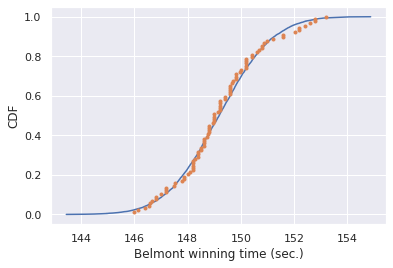

In [7]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

**Note** : CDF teoretis dan ECDF data menunjukkan bahwa waktu kemenangan Belmont memang terdistribusi secara normal. Ini juga menunjukkan bahwa dalam sekitar 100 tahun terakhir, belum ada kemajuan teknologi atau pelatihan besar yang secara signifikan memengaruhi kecepatan kuda dapat menjalankan lomba ini.

### What are the chances of a horse matching or beating Secretariat's record?

Asumsikan bahwa waktu pemenang Belmont didistribusikan secara normal (dengan tahun 1970 dan 1973 dihapus), berapakah probabilitas bahwa pemenang dari taruhan Belmont yang diberikan akan menjalankannya secepat atau lebih cepat daripada Sekretariat?

In [8]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144) / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000661


**Note** : Kami harus mengambil satu juta sampel karena kemungkinan waktu cepat sangat rendah dan kami harus yakin untuk sampel cukup. Kami mendapat bahwa hanya ada peluang 0,06% dari kuda yang menjalankan Belmont secepat Sekretariat.

## The Exponential distribution

### Matching a story and a distribution

Bagaimana kita bisa berharap waktu antara Liga Utama yang no-hitters akan didistribusikan? Berhati-hatilah di sini: beberapa latihan yang lalu, kami mempertimbangkan distribusi probabilitas untuk jumlah yang no-hitters dalam satu musim. Sekarang, kita melihat distribusi probabilitas waktu antara no-hitters.

**Answer** : Exponential

### Waiting for the next Secretariat

Sayangnya, Justin tidak hidup ketika Sekretariat menjalankan Belmont pada tahun 1973. Apakah Anda pikir dia akan melihat pertunjukan seperti itu? Untuk menjawab ini, Anda tertarik pada berapa tahun Anda akan menunggu sampai Anda melihat kinerja lain seperti Sekretariat. Bagaimana waktu tunggu hingga kinerja berikutnya baik atau lebih baik daripada yang didistribusikan Sekretariat? Pilih jawaban terbaik.

**Answer** : Eksponensial: Seekor kuda secepat Sekretariat adalah peristiwa langka, yang dapat dimodelkan sebagai proses Poisson, dan waktu tunggu antara kedatangan proses Poisson didistribusikan secara eksponensial.

**Note** : Distribusi Eksponensial menggambarkan waktu tunggu antara peristiwa langka, dan Sekretariat langka!

### If you have a story, you can simulate it!

Terkadang, cerita yang menggambarkan distribusi probabilitas kami tidak memiliki distribusi bernama untuk menyertainya. Dalam kasus ini, jangan takut! Anda selalu dapat mensimulasikannya. Kami akan melakukannya dalam latihan ini dan selanjutnya.

Dalam latihan sebelumnya, kami melihat peristiwa langka yang no-hitter di Major League Baseball. Memukul siklus adalah acara bisbol langka lainnya. Ketika adonan memukul siklus, ia mendapatkan keempat jenis hit, satu, dua, tiga, dan home run, dalam satu pertandingan. Seperti no-hitter, ini dapat dimodelkan sebagai proses Poisson, sehingga waktu antara hit dari siklus juga didistribusikan secara eksponensial.

Berapa lama kita harus menunggu untuk melihat keduanya yang no-hitter dan kemudian adonan memukul siklus? Idenya adalah bahwa kita harus menunggu beberapa waktu untuk yang no-hitter, dan kemudian setelah yang no-hitter, kita harus menunggu untuk memukul siklus. Dinyatakan dengan cara lain, berapa total waktu tunggu untuk kedatangan dua proses Poisson yang berbeda? Total waktu tunggu adalah waktu menunggu untuk tidak ada pemukul (*no-hitter*), ditambah waktu menunggu untuk memukul siklus.

Sekarang, Anda akan menulis fungsi untuk mengambil sampel dari distribusi yang dijelaskan oleh cerita ini.

In [9]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau1, size)

    return t1 + t2

### Distribution of no-hitters and cycles

Sekarang, Anda akan menggunakan fungsi pengambilan sampel untuk menghitung waktu tunggu untuk mengamati no-hitter dan memukul siklus. Waktu tunggu rata-rata untuk no-hitter adalah 764 game, dan waktu tunggu rata-rata untuk mencapai siklus adalah 715 game.

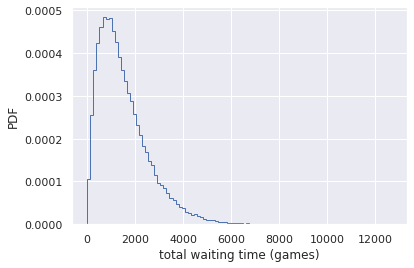

In [11]:
# Draw samples of waiting times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, histtype='step',
             density=True)

# Label axes
_ = plt.xlabel('total waiting time (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

**Note** : Perhatikan bahwa PDF memuncak, tidak seperti waktu tunggu untuk proses Poisson tunggal. Untuk bersenang-senang (dan pencerahan), saya mendorong Anda untuk juga plotting CDF.